In [1]:
# Importing and setup
import pandas as pd
import matplotlib
import sklearn
import numpy as np
%matplotlib inline

There are 3150 samples, and 8 features.


'\nThe following interpretations can be drawn from the histograms:\n\n1. From (a), the overwhelming majority of articles (>50%) contain between 0 and 5000 characters, some (~30%) contain between 5000 and 10000 characters\n2. From (b), it can be observed that there is an even split among the data between all 9 leaf labels\n3. From (c), it can be observed that there are exactly 350 more articles with sports as the root label than climate as the root label. This makes sense because there are 5 leaf labels under sports and only 4 leaf labels under climate.\n'

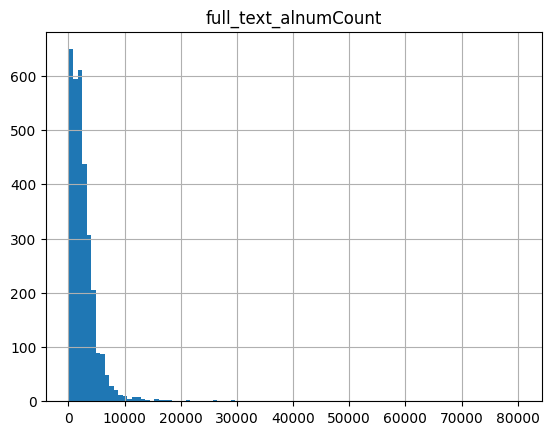

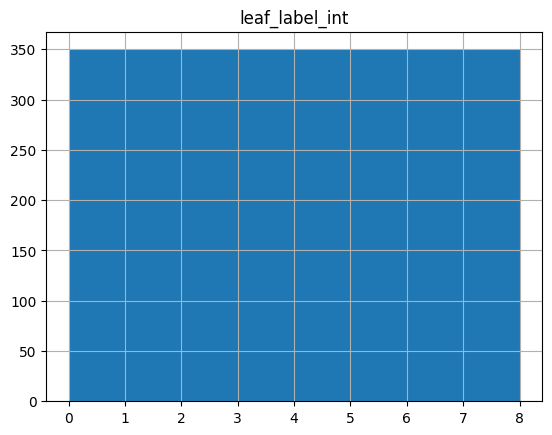

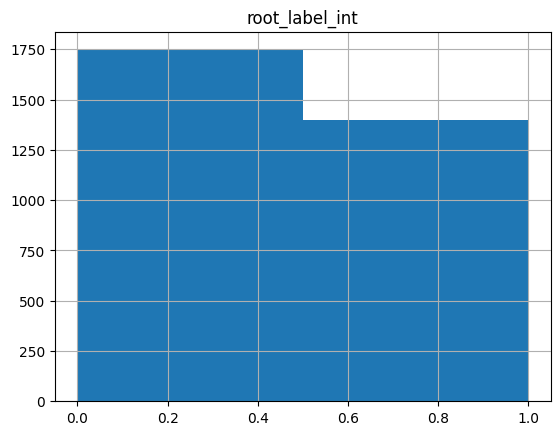

In [2]:
########## Question 1
df = pd.read_csv('Project1-Classification.csv')

########## Overview
print("There are " + str(df.shape[0]) + " samples, and " + str(df.shape[1]) + " features.")

########## Histograms
##### a
# define lambda function to count alpha-numeric characters
count_alpha_numeric = lambda s: sum(c.isalnum() for c in s)

# apply lambda function to each row of full_text
df['full_text_alnumCount'] = df['full_text'].apply(count_alpha_numeric)

# generate histogram
df.hist(column="full_text_alnumCount", bins=100)

##### b
# create a dictionary to map  labels to unique integer values
leaf_label_map = {label: i for i, label in enumerate(df['leaf_label'].unique())}

# create a new column in the DataFrame with the integer values
df['leaf_label_int'] = df['leaf_label'].map(leaf_label_map)

# generate histogram
df.hist(column="leaf_label_int", bins=9)

##### c
# create a dictionary to map  labels to unique integer values
root_label_map = {label: i for i, label in enumerate(df['root_label'].unique())}

# create a new column in the DataFrame with the integer values
df['root_label_int'] = df['root_label'].map(root_label_map)

df.hist(column="root_label_int", bins=2)

########## Interpret Plots
"""
The following interpretations can be drawn from the histograms:

1. From (a), the overwhelming majority of articles (>50%) contain between 0 and 5000 characters, some (~30%) contain between 5000 and 10000 characters
2. From (b), it can be observed that there is an even split among the data between all 9 leaf labels
3. From (c), it can be observed that there are exactly 350 more articles with sports as the root label than climate as the root label. This makes sense because there are 5 leaf labels under sports and only 4 leaf labels under climate.
"""

In [3]:
########## Question 2
import numpy as np
import random
np.random.seed(42)
random.seed(42)
from sklearn.model_selection import train_test_split
train, test = train_test_split(df[["full_text","root_label_int"]], test_size=0.2)


print("There are " + str(train.shape[0]) + " training samples and " + str(test.shape[0]) + " test samples.")

There are 2520 training samples and 630 test samples.


In [4]:
########### Question 3
train['full_text'].head(1)
# Cleaner code:
import re
def clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

# processing data by using provided cleaner code
train["cleaned"] = train['full_text'].apply(clean)
test["cleaned"] = test['full_text'].apply(clean)

# Using english stopwords of the CountVectorizer and excluding terms that are numbers with the token pattern argument
from sklearn.feature_extraction.text import CountVectorizer
pattern = r'\b[A-Za-z]+\b'
vectorizer = CountVectorizer(stop_words='english',token_pattern=pattern, min_df=3)

# Creating vector representations from the CountVectorizer created of the processed training and test data
Xtrain = vectorizer.fit_transform(train['cleaned'])
Xtest = vectorizer.fit_transform(test['cleaned'])
ytrain = train['root_label_int'].values
ytest = test['root_label_int'].values
print(ytrain)



[1 1 1 ... 0 0 0]


In [5]:
########## Question 6
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

logistic_reg = LogisticRegression(penalty='none')
logistic_reg.fit(Xtrain, ytrain)

y_score = logistic_reg.decision_function(Xtest)
fpr, tpr, _ = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()




/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: X has 7730 features, but LogisticRegression is expecting 17228 features as input.

In [ ]:
train.head()